In [86]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
import numpy as np
import gc
from sklearn import svm, preprocessing

In [87]:
df = pd.read_csv('pg_view_tag_perc_breakdown.csv')
del df['Unnamed: 0']
df['timestamp'] = df['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['mth_day'] = df['timestamp'].map(lambda x: x.strftime("%m-%d"))
df.sort_values('mth_day',inplace = True)
df = df.reset_index(drop=True)
#del df['timestamp']
df.head(10)

,timestamp,action,christmas,halloween,horror,comedy,romance,mth_day
0,2018-01-01 15:42:00,27.220380,1.046938,1.744896,5.583668,23.381609,14.133659,01-01
1,2012-01-01 15:42:00,28.088191,1.510118,0.604047,7.852613,20.839625,18.121413,01-01
2,2011-01-01 15:42:00,19.532746,1.531980,0.382995,3.829950,21.830716,9.574876,01-01
3,2019-01-01 15:42:00,21.034433,1.584786,1.296643,6.915430,19.593718,13.974932,01-01
4,2020-01-01 15:42:00,20.250723,2.571520,0.964320,8.678881,22.179364,17.357763,01-01
5,2007-01-01 15:42:00,28.086218,1.959504,1.306336,7.838014,26.126715,18.941868,01-01
6,2017-01-01 15:42:00,26.660084,1.234263,0.000000,10.367810,16.539126,13.576895,01-01
7,2015-01-01 15:42:00,36.199095,2.801120,0.646412,7.756949,21.762551,13.574661,01-01
8,2009-01-01 15:42:00,27.984009,0.571102,0.000000,5.139920,26.841805,14.277556,01-01
9,2008-01-01 15:42:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,01-01


In [88]:
tag = "halloween"
df[tag+'_ra'] = df[tag].rolling(window=14,center=True).mean() 

In [89]:
date = pd.date_range(start='2016-01-01',end='2016-12-31')
df_avg = pd.DataFrame({'dates':date})
df_avg["mth_day"] = df_avg['dates'].map(lambda x: x.strftime("%m-%d"))
df_avg[tag]=0
del df_avg['dates']
df_avg.head()

,mth_day,halloween
0,01-01,0
1,01-02,0
2,01-03,0
3,01-04,0
4,01-05,0


In [90]:
i = 0
count = 0
total = 0
for t in df_avg.mth_day:
    count = 0
    total = 0
    j = 0
    for s in df.mth_day:
        if t == s and j<len(df.index):
            #print(df['horror_ra'].loc[j])
            total+=df[tag+'_ra'].loc[j]
            count+=1
        j+=1
    if(count == 0):
        count = 1
    #print(count)
    df_avg.loc[i] = [t,(total/count)]
    i+=1
df_avg.head(32)

,mth_day,halloween
0,01-01,NaN
1,01-02,0.618181
2,01-03,0.824559
3,01-04,0.633808
4,01-05,0.528542
5,01-06,0.485315
6,01-07,0.653872
7,01-08,0.819886
8,01-09,0.514952
9,01-10,0.609773


In [91]:
X = np.array(df_avg[tag].values)#.tolist()
X = preprocessing.scale(X)
df_avg[tag] = X
df_avg.tail()

,mth_day,halloween
361,12-27,-1.325134
362,12-28,-0.594912
363,12-29,-0.381404
364,12-30,0.466854
365,12-31,NaN


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

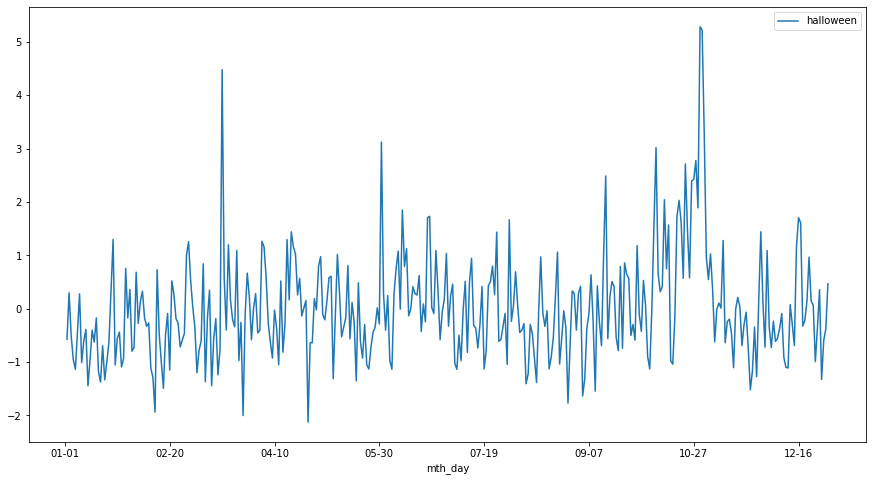

In [92]:
df_avg.plot(x='mth_day',y=tag,figsize = (15,8))
fig.savefig('graphs/daily_avg_over_yrs/'+ tag+'.pdf')

In [ ]:
fig = df_avg.plot(x='mth_day',y=tag,figsize = (15,8))
fig.figure.savefig('graphs/daily_avg_over_yrs/'+ tag+'.pdf')